# << SeSAC 제 1차 해커톤: 데이터분석 축제 발표 >>

# 주제 : 데이터셋3 한국에 방문하는 외국인 데이터셋

# 욕심은많조
## 발표자 : 안가영  -  조원 : 김경문, 나 융

#### 데이터셋 개요
* 2019년 한국에 방문한 외국인 데이터셋
* 방문객의 국적, 한국에 온 목적, 연령 등에 따라 구분한 데이터

원문 링크: https://www.kaggle.com/bappekim/south-korea-visitors

활동 목표: 주어진 자료 대한 전체적인 관찰과 다각적인 특이점 도출을 통해, 해당 데이터셋을 활용함에 있어 발생할 수 있는 인사이트 ??? 방안에 대하여 고찰해봄

## 1. 데이터셋 준비
### 1) 패키지 로드

In [1]:
# 데이터 다루기 및 시각화 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시스템 관련 함수
import os
from os.path import join

In [2]:
# 홈디렉토리 설정 및 폴더 내 파일 목록 호출
rootpath = os.getenv("HOME")+'/aiffel/thon'
data_path = []
for dirname, _, filenames in os.walk(rootpath + '/data'):
    for filename in filenames:
        data_path.append(os.path.join(dirname, filename))

In [3]:
data_path

['/aiffel/aiffel/thon/data/Enter_korea_by_purpose.csv',
 '/aiffel/aiffel/thon/data/Enter_korea_by_age.csv',
 '/aiffel/aiffel/thon/data/Enter_korea_by_gender.csv']

### 2) 데이터셋 살펴보기

* __데이터셋 공통 속성__
    - 'date' : 2019-01 부터 2020-04 까지 16 개월 기간
    - 'nation' : 60 개국
    - 'visitor' : 해당 기간 여행객 수
    - 'growth' : 전년 동월 대비 여행객 증가율
    - 'share' : 해당 월간 특정 국가 여행객 비율
    
    
* __개별 데이터 속성__
    - 입국 유형(Purpose) : Tourism, Business, Official affiars, Studying, Others
    - 입국자 연령(Age) : 전 연령을 여섯 구간으로 분리
    - 입국자 성별(Gender) : 여/남성, 승무원(Crewman)

In [4]:
# 60 countries x 16 months = 960 entries, 10 keys
# 여행객 별 입국 유형
df_purp = pd.read_csv(data_path[0])
df_purp.info()
df_purp.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              960 non-null    object 
 1   nation            960 non-null    object 
 2   visitor           960 non-null    int64  
 3   growth            960 non-null    float64
 4   share             960 non-null    float64
 5   tourism           960 non-null    int64  
 6   business          960 non-null    int64  
 7   official affairs  960 non-null    int64  
 8   studying          960 non-null    int64  
 9   others            960 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 75.1+ KB


,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019-1,China,392814,28.737870,35.555117,320113,2993,138,8793,60777
1,2019-1,Japan,206526,23.606830,18.693468,198805,2233,127,785,4576
2,2019-1,Taiwan,87954,16.003693,7.961057,86393,74,22,180,1285


In [5]:
# 여행객 연령대 별 인원
df_age = pd.read_csv(data_path[1])
df_age.info()
df_age.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      960 non-null    object 
 1   nation    960 non-null    object 
 2   visitor   960 non-null    int64  
 3   growth    960 non-null    float64
 4   share     960 non-null    float64
 5   age0-20   960 non-null    int64  
 6   age21-30  960 non-null    int64  
 7   age31-40  960 non-null    int64  
 8   age41-50  960 non-null    int64  
 9   age51-60  960 non-null    int64  
 10  age61     960 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 82.6+ KB


,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61
0,2019-1,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,40998
1,2019-1,Japan,206526,23.606830,18.693468,18015,57921,34165,39811,33857,20330
2,2019-1,Taiwan,87954,16.003693,7.961057,18888,17927,18595,18862,8169,4566


In [6]:
# 여행객 성별 및 승무원
df_gender = pd.read_csv(data_path[2])
df_gender.info()
df_gender.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     960 non-null    object 
 1   nation   960 non-null    object 
 2   visitor  960 non-null    int64  
 3   growth   960 non-null    float64
 4   share    960 non-null    float64
 5   male     960 non-null    int64  
 6   female   960 non-null    int64  
 7   crewman  960 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 60.1+ KB


,date,nation,visitor,growth,share,male,female,crewman
0,2019-1,China,392814,28.737870,35.555117,147511,231722,13581
1,2019-1,Japan,206526,23.606830,18.693468,75070,129029,2427
2,2019-1,Taiwan,87954,16.003693,7.961057,30805,56202,947


## 2. 데이터 시각화
### 1) 전체 국가별 방문객 현황
* 중국과 일본이 가장 큰 비율을 차지하고, 대만과 홍콩이 뒤를 잇는다
* 2020년도 2-3월을 기점으로 코로나의 영향을 확인할 수 있다

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


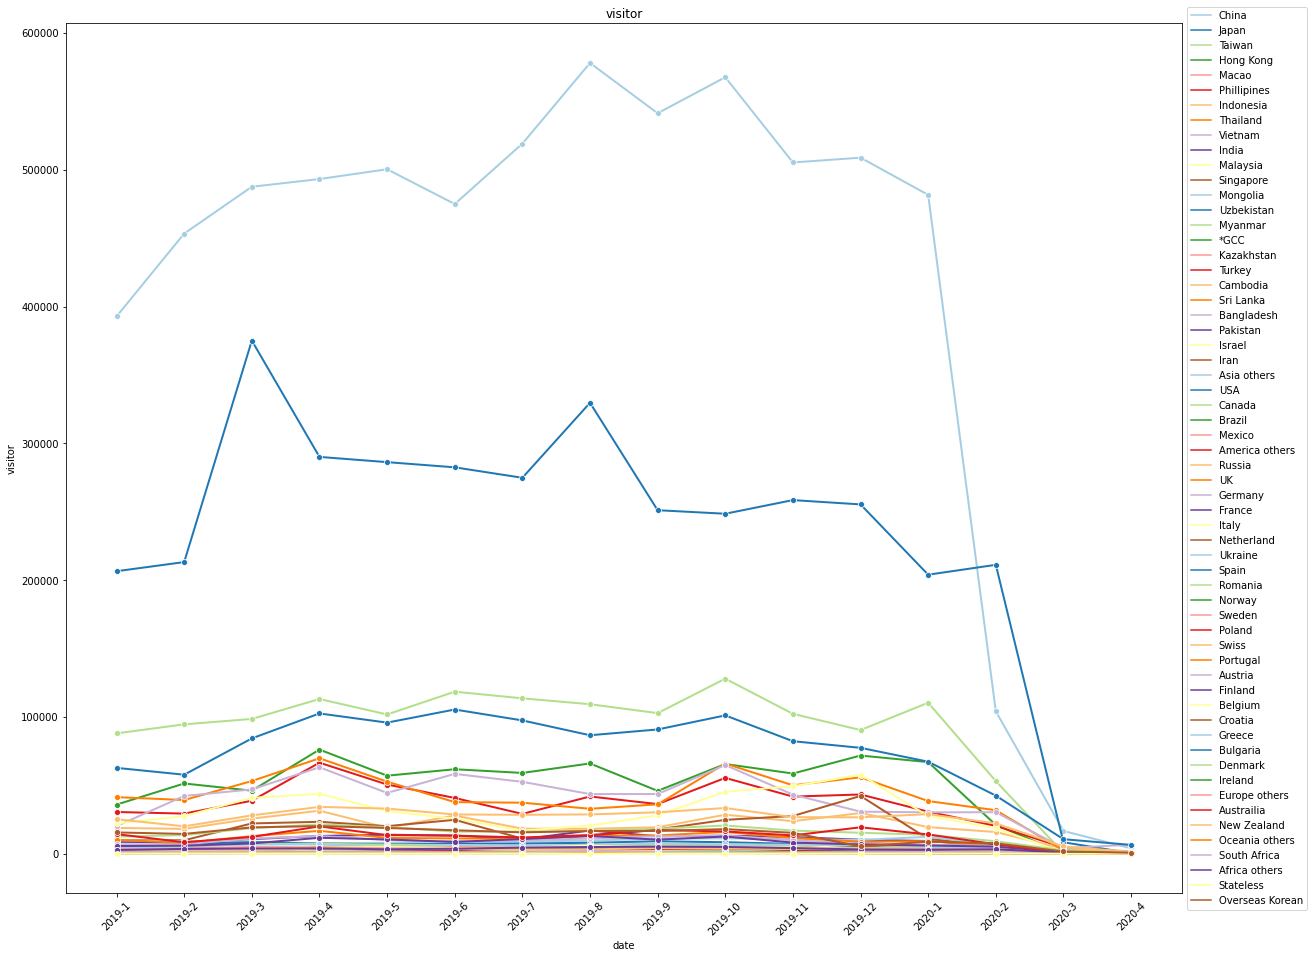

In [7]:
def all_graph(df, x, y, length):
    fig,axes = plt.subplots(1,1,figsize=(20, 16))
    axes.set_title(y)
    axes.set_ylabel(y)
    axes.set_xlabel(x)
    axes.set_xticklabels(df[x].unique(), rotation=45)
    qualitative_colors = sns.color_palette("Paired", length)
    sns.lineplot(x, y, ci=None, hue='nation', 
                 marker='o', data=df, linewidth=2, palette=qualitative_colors)
    axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    return

all_graph(df_age, 'date', 'visitor', 60)

### 2) 국가별 연령, 목적, 성별에 따른 특이점 탐색

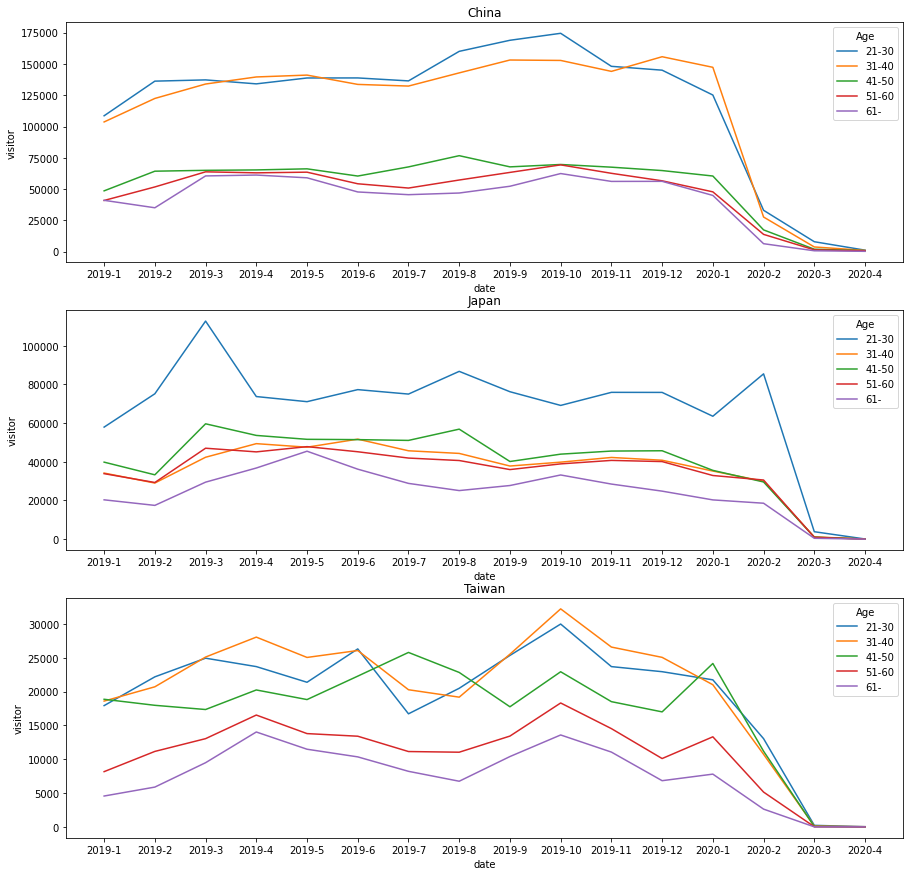

In [8]:
# 특정 국가 필터링 및 불필요한 컬럼 제거
def df_nation_slice(df, nation):
    df_date = df[df['nation']==nation].iloc[:,0]
    df_contents = df[df['nation']==nation].iloc[:,5:]
    df_result = pd.concat([df_date, df_contents],axis=1)   # visitor, growth, share 제거
    return df_result

# 국가 별 여행객 연령 그래프 출력
def multi_graph_nation_age(df, nations):
    fig, axes = plt.subplots(len(nations),1, figsize=(15,5*len(nations)))

    for idx, nation in enumerate(nations):
        df_result = df_nation_slice(df, nation)
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='age21-30', label='21-30')
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='age31-40', label='31-40')
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='age41-50', label='41-50')
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='age51-60', label='51-60')
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='age61', label='61-')
        axes[idx].set_title(nation)
        axes[idx].set_ylabel('visitor')
        axes[idx].legend(title='Age')
        
    return

nations = df_age['nation'].unique()[0:3]   # 3 개국 불러오기
multi_graph_nation_age(df_age, nations)   # 그래프 플로팅

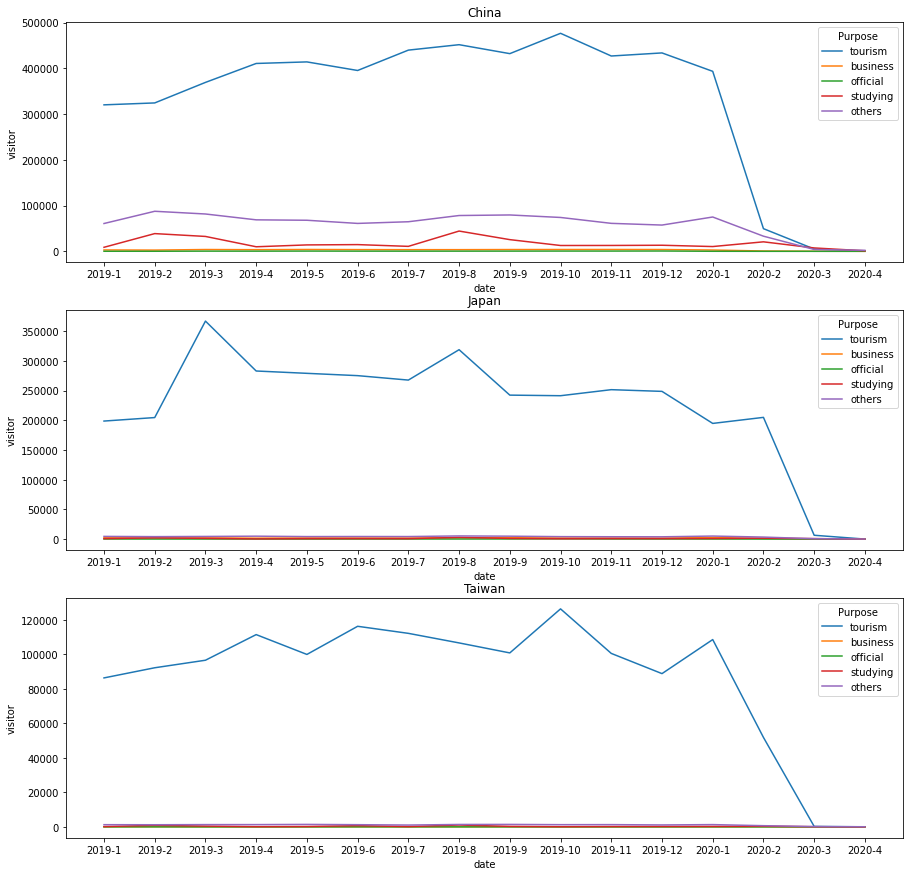

In [9]:
# 국가 별 여행객 입국유형 그래프 출력
def multi_graph_nation_purp(df, nations):
    fig, axes = plt.subplots(len(nations),1, figsize=(15,5*len(nations)))

    for idx, nation in enumerate(nations):
        df_result = df_nation_slice(df, nation)
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='tourism', label='tourism')
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='business', label='business')
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='official affairs', label='official')
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='studying', label='studying')
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='others', label='others')
        axes[idx].set_title(nation)
        axes[idx].set_ylabel('visitor')
        axes[idx].legend(title='Purpose')
        
    return

nations = df_purp['nation'].unique()[0:3]   # 3 개국 불러오기
multi_graph_nation_purp(df_purp, nations)   # 그래프 플로팅

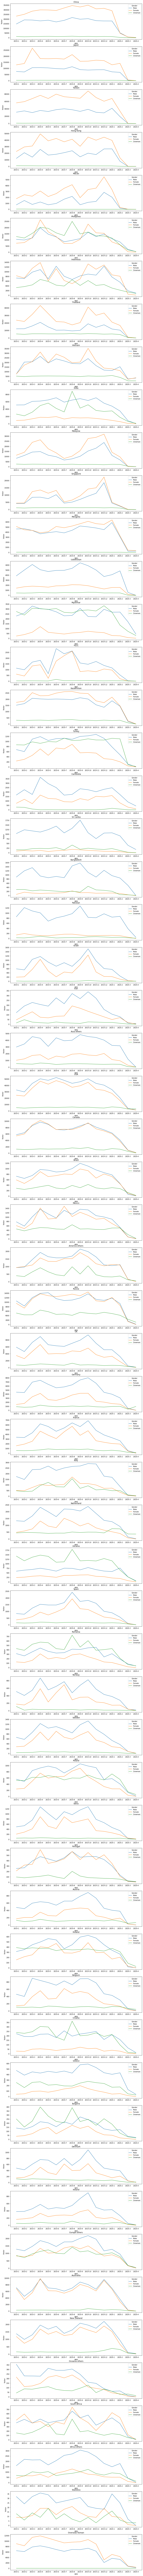

In [10]:
# 국가 별 여행객 성별 그래프 출력
def multi_graph_nation_gender(df, nations):
    fig, axes = plt.subplots(len(nations),1, figsize=(15,5*len(nations)))

    for idx, nation in enumerate(nations):
        df_result = df_nation_slice(df, nation)
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='male', label='Male')
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='female', label='Female')
        sns.lineplot(ax=axes[idx], data=df_result, x='date', y='crewman', label='Crewman')
        axes[idx].set_title(nation)
        axes[idx].set_ylabel('Visitor')
        axes[idx].legend(title='Gender')
        
    return

nations = df_gender['nation'].unique()   # 3 개국 불러오기
multi_graph_nation_gender(df_gender, nations)   # 그래프 플로팅

-> 전체 매트릭스 PDF 에서 이상치 1 2 3 관찰

특정 국가 플로팅? nation=['ccc','aaa',...]

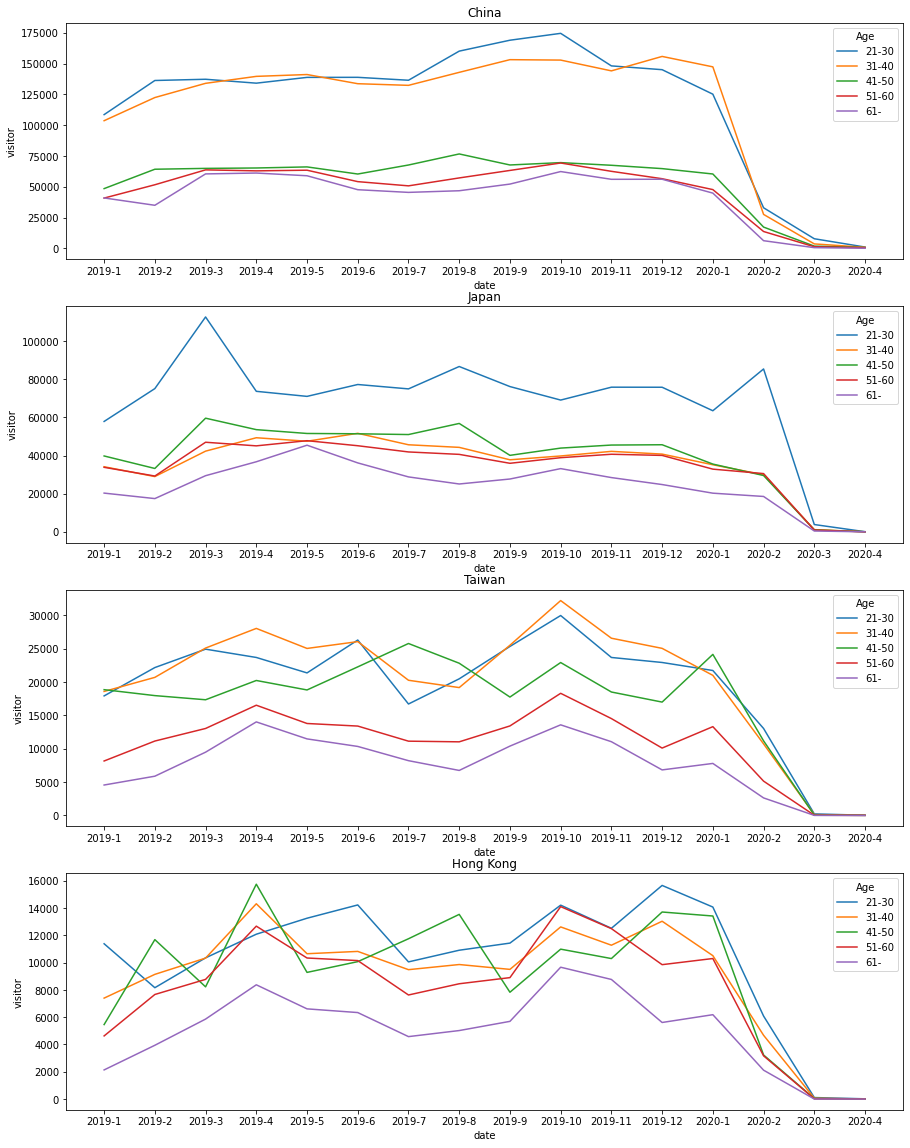

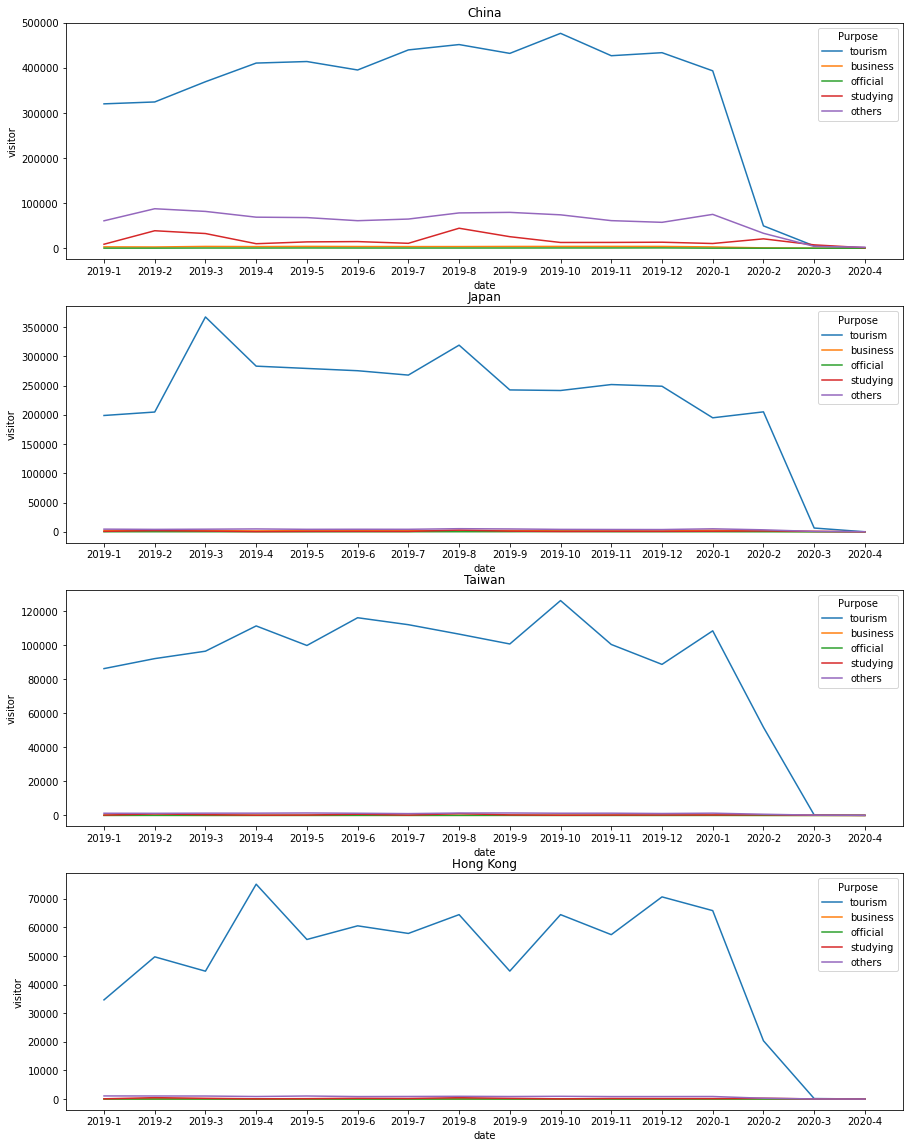

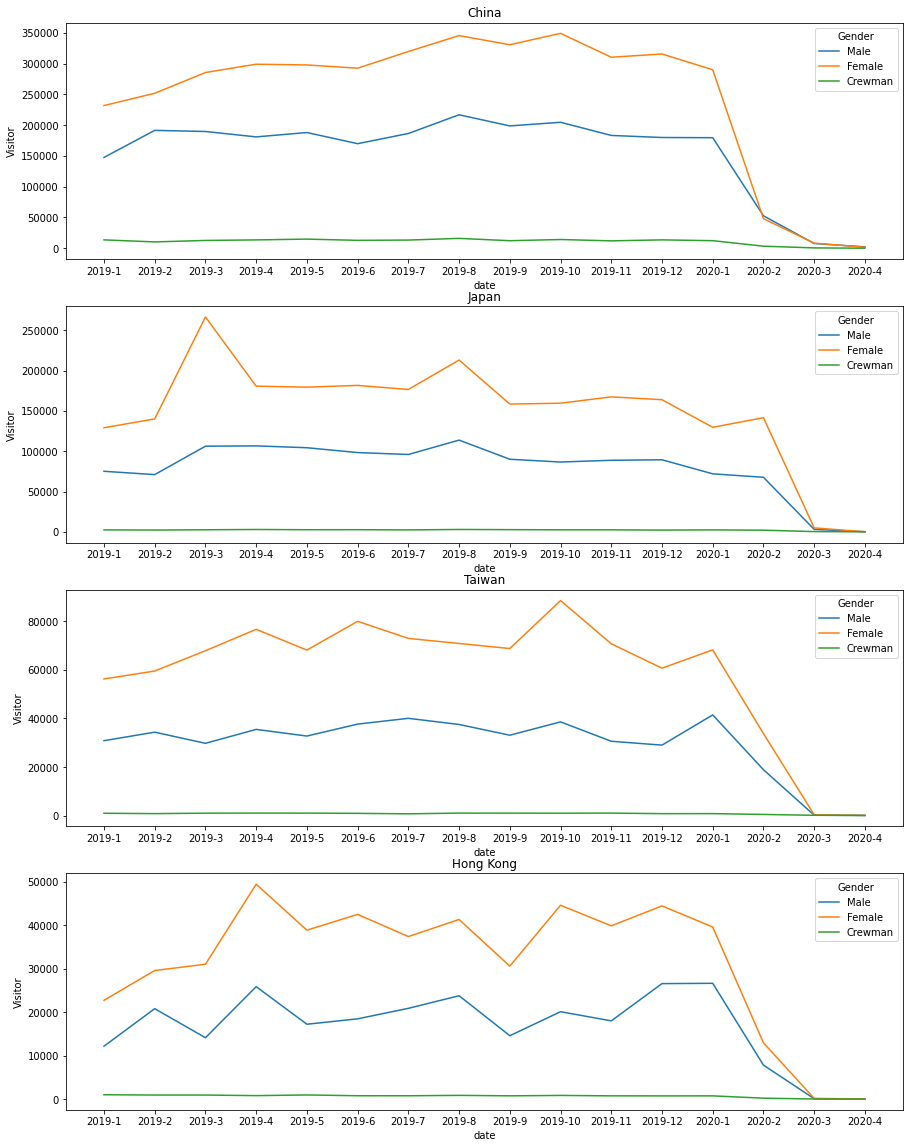

In [11]:
nations=['China', 'Japan', 'Taiwan', 'Hong Kong']
multi_graph_nation_age(df_age, nations)   
multi_graph_nation_purp(df_purp, nations) 
multi_graph_nation_gender(df_gender, nations)

### 4) 인사이트 도출을 위한 대상 특정
전체기간 합쳐서 중국, 일본 -> 연령대, 여행목적

국가별 방문객 비율 -> 파이 그래프

In [111]:
df_nation_age_sum = df_age.groupby(['nation']).sum()
df_nation_age_sum.head()

df_nation_purp_sum = df_purp.groupby(['nation']).sum()
df_nation_purp_sum.head()

,visitor,growth,share,tourism,business,official affairs,studying,others
nation,,,,,,,,
*GCC,38103,-18.373715,2.839851,34688,403,167,1320,1525
Africa others,54320,-9.412704,5.652205,22177,10585,1210,3652,16696
America others,47597,44.156169,4.254156,35578,250,562,1586,9621
Asia others,84892,-58.944540,8.106655,35375,6386,3007,4239,35885
Austrailia,194998,-62.858067,15.329128,173354,1144,548,655,19297


In [113]:
df_pie_age = df_nation_age_sum.loc[['China','Japan'], 'age0-20':].transpose()
df_pie_purp = df_nation_purp_sum.loc[['China','Japan'], 'tourism':].transpose()

In [119]:
df_pie_age

nation,China,Japan
age0-20,423696,426179
age21-30,1894302,1079631
age31-40,1835184,571123
age41-50,864272,638839
age51-60,760557,550992
age61,675872,393140


* 여행객 1,2위 국가 연령대 비율 -> 20-30대 가장 큰 비율이 나타남

array([<AxesSubplot:ylabel='China'>, <AxesSubplot:ylabel='Japan'>],
      dtype=object)

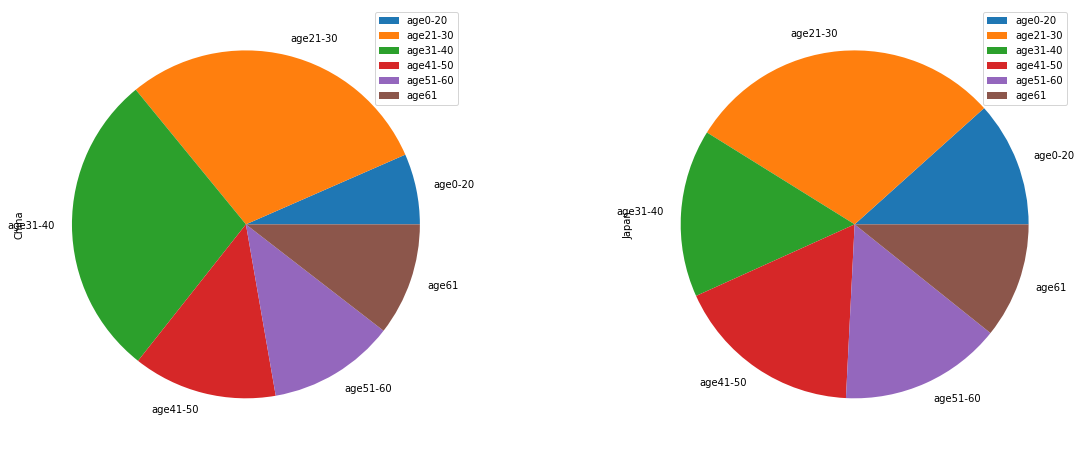

In [121]:
df_pie_age.plot.pie(subplots=True, figsize=(20,8))

In [120]:
df_pie_purp

nation,China,Japan
tourism,5341847,3585819
business,47709,28194
official affairs,5067,2264
studying,277895,16333
others,956800,62971


*

array([<AxesSubplot:ylabel='China'>, <AxesSubplot:ylabel='Japan'>],
      dtype=object)

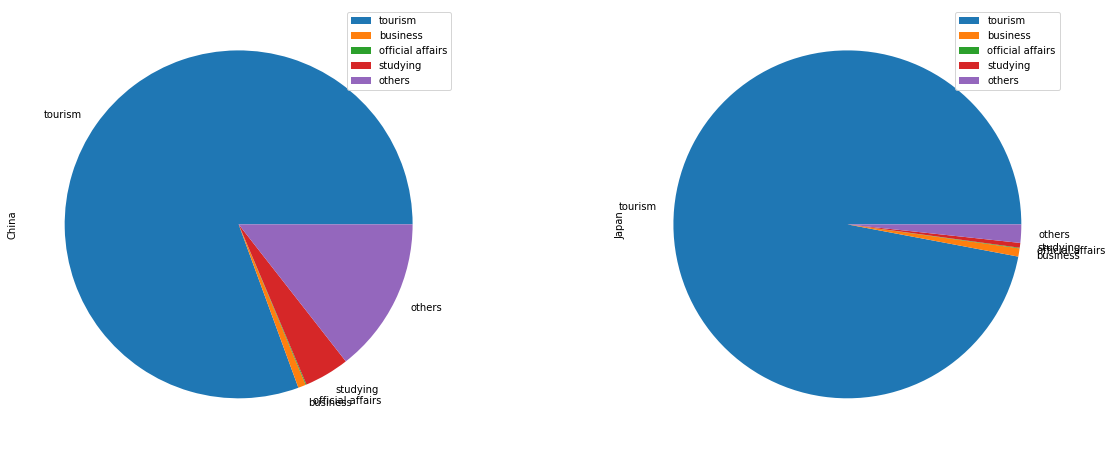

In [123]:
df_pie_purp.plot.pie(subplots=True, figsize=(20,8))